# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [6]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# disable pop_up display of graphs to display them in notebook.
%matplotlib inline

### Understanding the structure of the data

In [4]:
# read the data
data = pd.read_csv('foodhub_order.csv')

df = data.copy()
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:
Data in each row corresponds to the order placed by a single customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# We use pandas.DataFrame.shape to get an idea of the number of rows and columns.
df.shape

(1898, 9)

#### Observations:
* We have a total of 1898 orders, and a total of 9 categories across which to analyze and draw conclusions. 

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* Datatype breakdown of the 9 Categories:
    * 4 with the data_type integer.
    * 4 with the data_type object.
    * 1 with the data_type float.
* Observing the Non-Null Count for each column it appears that there are no non-null entries in any column because the total number of entries per column is the same the total number of entries in the data set.
* Interestingly, the *rating* column is not a numerical datatype, we will likely need to manipulate the data witin the column in order to perform mathematical operations with/on it. 


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [18]:
# Write your code here
"""
DataFrame.isna() generates a sub-DataFrame of booleans where *True* 
    equates to a null (missing) value and *False* equates to a non-null value.
DataFrame.sum() adds up all missing values in the sub-DataFrame generated by isna().
"""
print(f"{df.isna().sum()}\n")

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64



#### Observations:
 It appears that the data does not contain any missing values and therefore, we don't need to take any further action regarding missing values. 



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [58]:
# Write your code here
"""
DataFrame.describe() provides a descriptive statistical summary of the numerical data in the foodhub_order
    by column label.
    - the addition of T, allows us to more easily view the output by place the foodhub_order 
        labels vertically, and the statitiscal summary labels horizontally.
"""
print(f"{df.describe().T}\n")



                        count          mean            std         min  \
order_id               1898.0  1.477496e+06     548.049724  1476547.00   
customer_id            1898.0  1.711685e+05  113698.139743     1311.00   
cost_of_the_order      1898.0  1.649885e+01       7.483812        4.47   
food_preparation_time  1898.0  2.737197e+01       4.632481       20.00   
delivery_time          1898.0  2.416175e+01       4.972637       15.00   

                              25%         50%           75%         max  
order_id               1477021.25  1477495.50  1.477970e+06  1478444.00  
customer_id              77787.75   128600.00  2.705250e+05   405334.00  
cost_of_the_order           12.08       14.14  2.229750e+01       35.41  
food_preparation_time       23.00       27.00  3.100000e+01       35.00  
delivery_time               20.00       25.00  2.800000e+01       33.00  



In [59]:
"""
Updating the 'exclude' parameter of DataFrame.describe() we can get an analysis
of the non-numerical data.
"""
print(f"{df.describe(exclude='number').T}\n")

                count unique          top  freq
restaurant_name  1898    178  Shake Shack   219
cuisine_type     1898     14     American   584
day_of_the_week  1898      2      Weekend  1351
rating           1898      4    Not given   736



#### Observations:
**food_preparation_time** 
* Quick Facts:
    * min = 20.00
    * max = 35.00
    * average = 27.37
    * std = 4.63
    * Q1(25%) = 23.00
    * Q3(75%) = 31.00
* The min falls outside the lower 25% of data and the max falls outside the upper 75% of the data. 
    * Additionally, the min and max fall outside of 1 standard deviation from the mean. This could indicate that they are outliers and thus further analysis is required to understand their significance.

* Additional Observations:
    * **cost_of_the_order**
        * It appears that as the cost of the order increases so does the food preparation time. This is expected as, typically, the more an order costs often times the more complex it is to prepare. 
    * **delivery_time** 
        * It appears that the delivery time increases so does the food preparation time. This is interesting because one would think the two would show no correlation. 

### **Question 5:** How many orders are not rated? [1 mark]

In [51]:
# Write the code here
not_rated = [x for x in df["rating"] if not x.isnumeric()]

percent_unrated = 100 * (len(not_rated)/len(df["rating"]))

print(f"The total number of orders is: {len(df["rating"])}")
print(f"The number of unrated orders is: {len(not_rated)}")

print(f"The percent of unrated orders is: {percent_unrated:.2f}")


The total number of orders is: 1898
The number of unrated orders is: 736
The percent of unrated orders is: 38.78


#### Observations:
* Total number of orders: *1898*
* Total number of unrated orders: *736*
* To get a better visualization of the potential significance of the number of unrated orders we can look at what percent of the total number of orders the unrated ones are.
    * Percent unrated orders: ~38.78%
    * It appears that a non-trivial amount of orders went unrated by customers. 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Observations
* There appear to be repeat customers beacuse the number of orders is greater than the number of customer ids.
* Ordering is more popular on weekends.
* Customers give more ratings of '5' than of '4' and '3' combined, but many customers didn't provide a rating.
* There are more orders that have a higher cost than the mean.  
* Food preparation time appears to fall evenly around the mean.
* Delivery times are generally less than the mean. 

#### order_id

In [54]:
# Write the code here
"""
Get the number of unique order_ids
"""
df['order_id'].nunique()


1898

#### customer_id

In [55]:
"""
Get the number of unique customer_ids
"""
df['customer_id'].nunique()

1200

#### restaurant_name

In [56]:
""" 
Get the number of unique restaurant_names
"""
df['restaurant_name'].nunique()

178

#### cuisine_types

In [410]:
"""
Get the number of unique cuisine_types
"""
df['cuisine_type'].nunique()

14

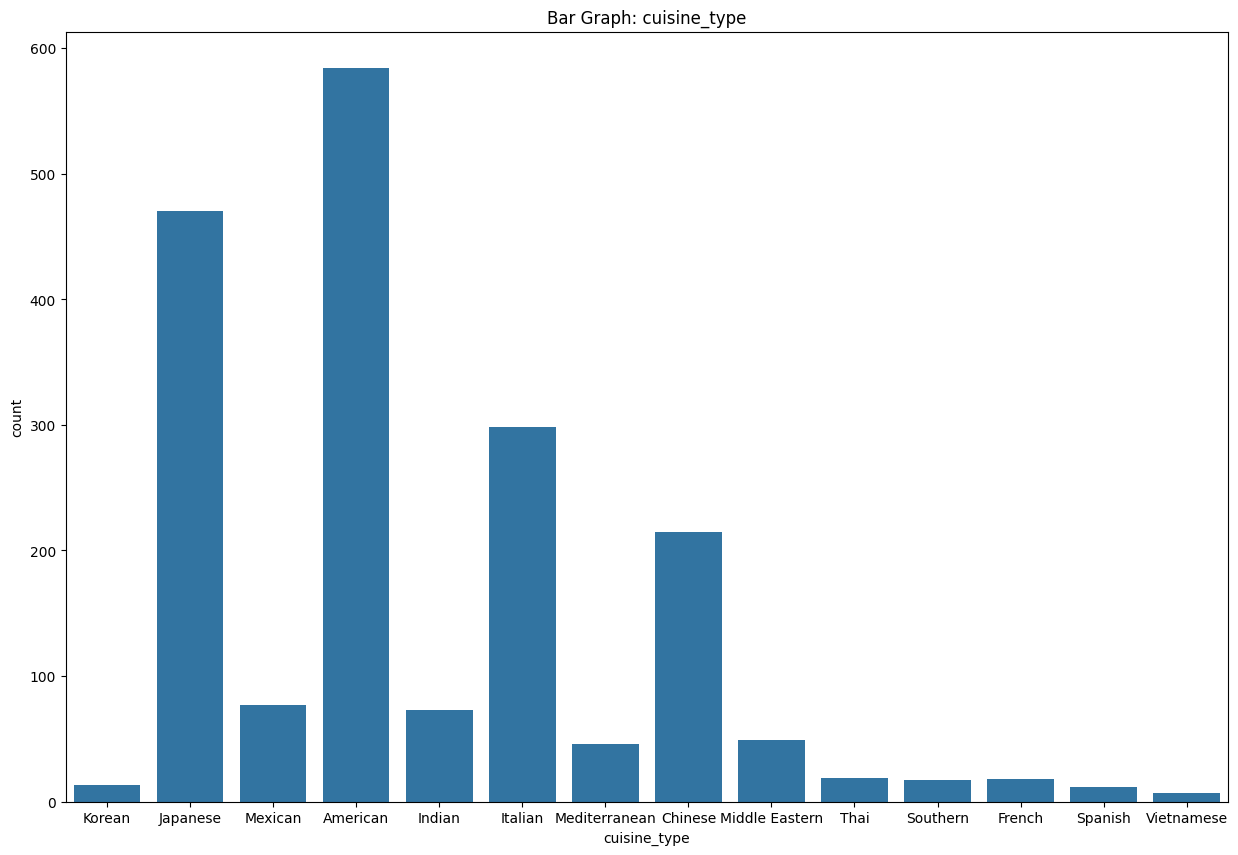

In [ ]:
def generate_bar_graph(data:pd.DataFrame, x:str, figsize:tuple[int, int]=(15,10)):
    """ 
    Generate a bar graph.
    Params:
        data: pd.DataFrame, the dataset.
        x: str, the data from the dataset to plot.
        figsize: tuple(int, int), the size of the resulting bar graph. Default=(15,10)
    Returns:
        None
    """
    plt.figure(figsize=figsize)
    plt.title(f"Bar Graph: {x}")
    sns.countplot(data=data, x=x)

# Get a bar graph to visualize the number of unique cuisine_types.
generate_bar_graph(df, 'cuisine_type')


#### cost_of_the_order

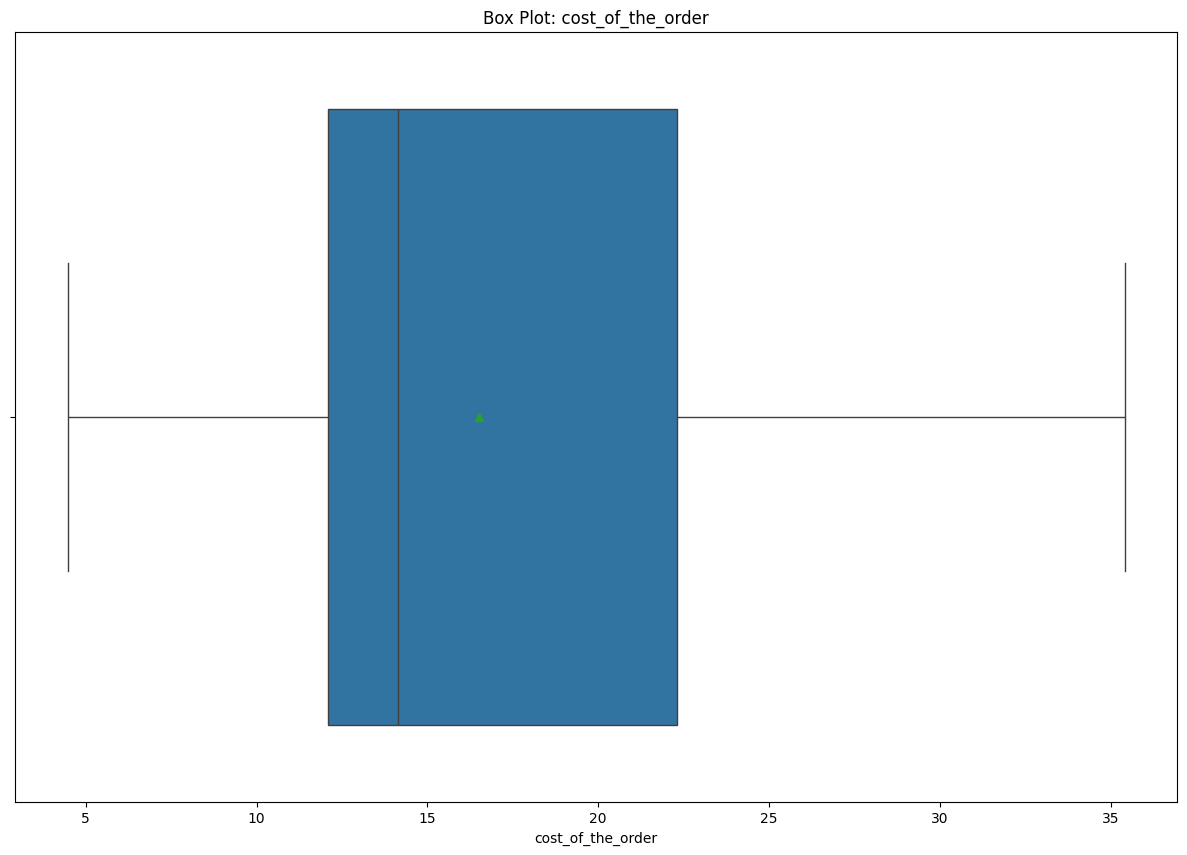

In [409]:
def generate_1_D_box_plot(data:pd.DataFrame, x:str, figsize:tuple[int, int]=(15, 10)):
    """ 
    Generate a 1-D Box Plot and display the means.
    Params:
        data: pd.DataFrame, the dataset
        x: str, the data from the dataset to plot
        figsize: tuple(int, int), the size of the resulting boxplot, default: (15,10)
    Returns:
        None
    """
    plt.figure(figsize=figsize)
    plt.title(f"Box Plot: {x}")
    sns.boxplot(data=data, x=x, showmeans=True)

# Get a box plot to visualize the spread of the cost of orders. 
generate_1_D_box_plot(df, 'cost_of_the_order')

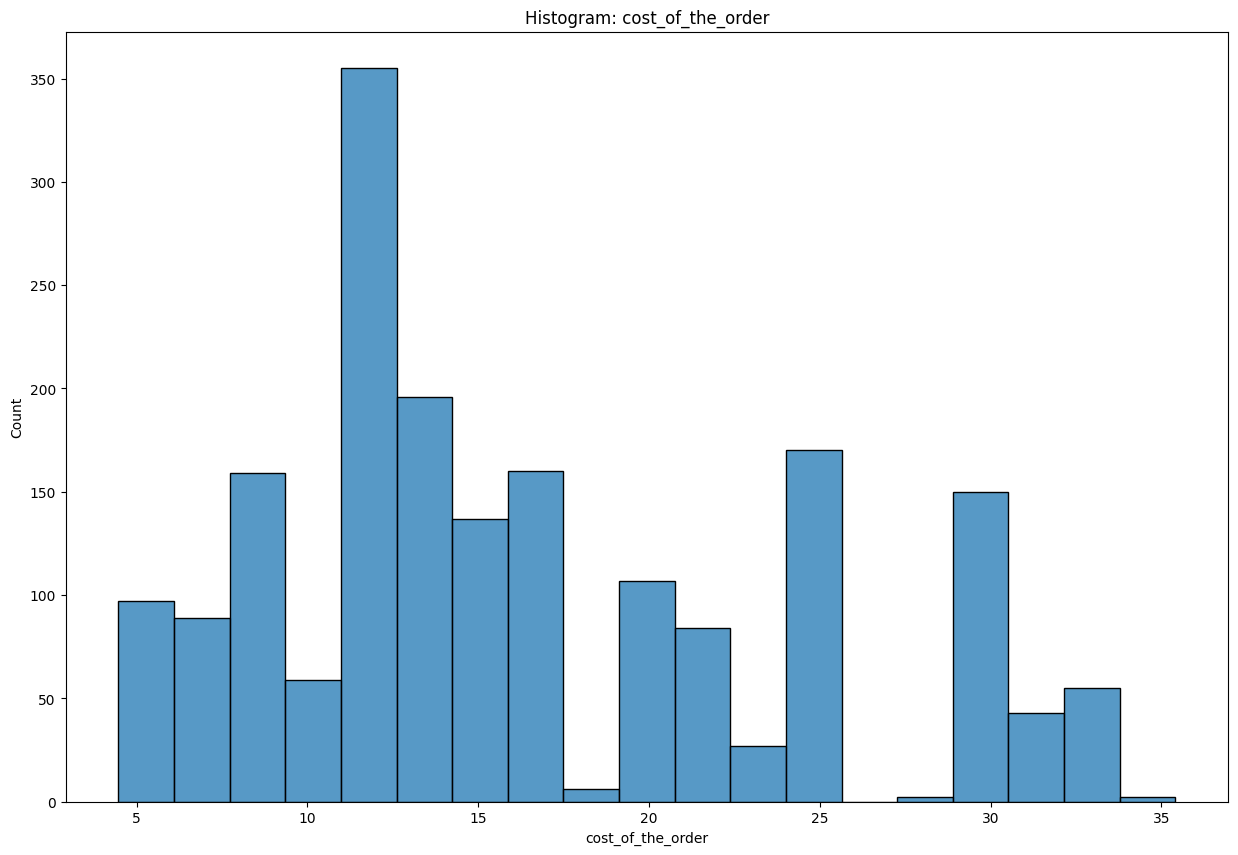

In [74]:
def generate_1_D_histogram(
        data:pd.DataFrame, 
        x:str, 
        figsize:tuple[int, int] = (15, 10),
        bins:str | int = 'auto', 
        kde:bool = False):
    """ 
    Generate a 1-D Histogram.
    Params:
        data: pd.DataFrame, the dataset.
        x: str, the data from the dataset to plot.
        figsize: tuple(int,int), the size of the resulting histogram. Default: (15,10).
        bins: str | int, number of bins to distribute the data into. Default: 'auto'.
        kde: bool, display the Kernel Density Estimation on the histogram. Default: False. 
    Returns:
        None
    """
    plt.figure(figsize=figsize)
    plt.title(f"Histogram: {x}")
    sns.histplot(data=data, x=x, bins=bins, kde=kde)

# Use a 1-D histogram to better visualize the distribtion of the costs of orders.
generate_1_D_histogram(df, 'cost_of_the_order')

#### day_of_the_week

In [75]:
# Get the number of times an order was placed on a 'Weekday' vs. a 'Weekend'
df['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

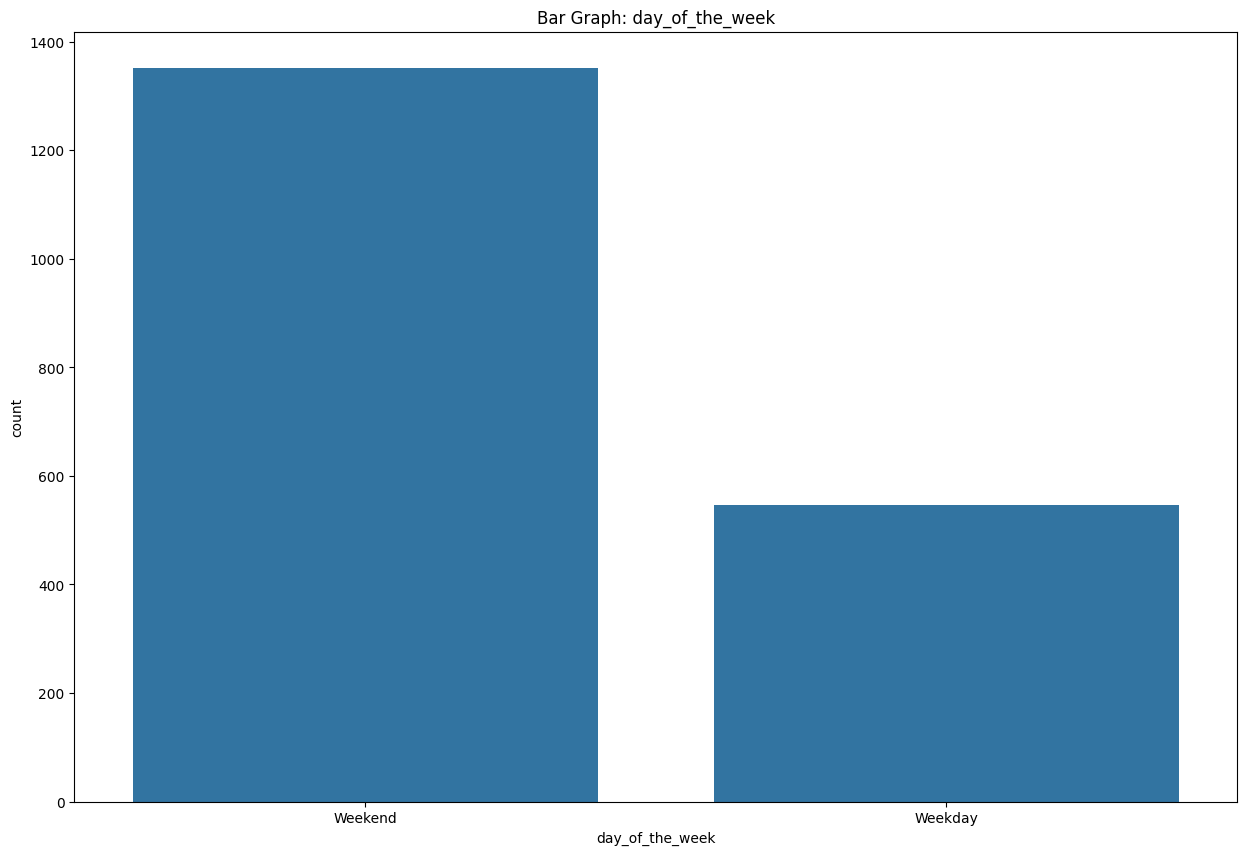

In [ ]:
# Use a bar graph to visualize the two amounts against each other.
generate_bar_graph(df, 'day_of_the_week')

#### rating

In [79]:
# Get the number of times a certain rating was given, 
# and the number of times a rating was not given.
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

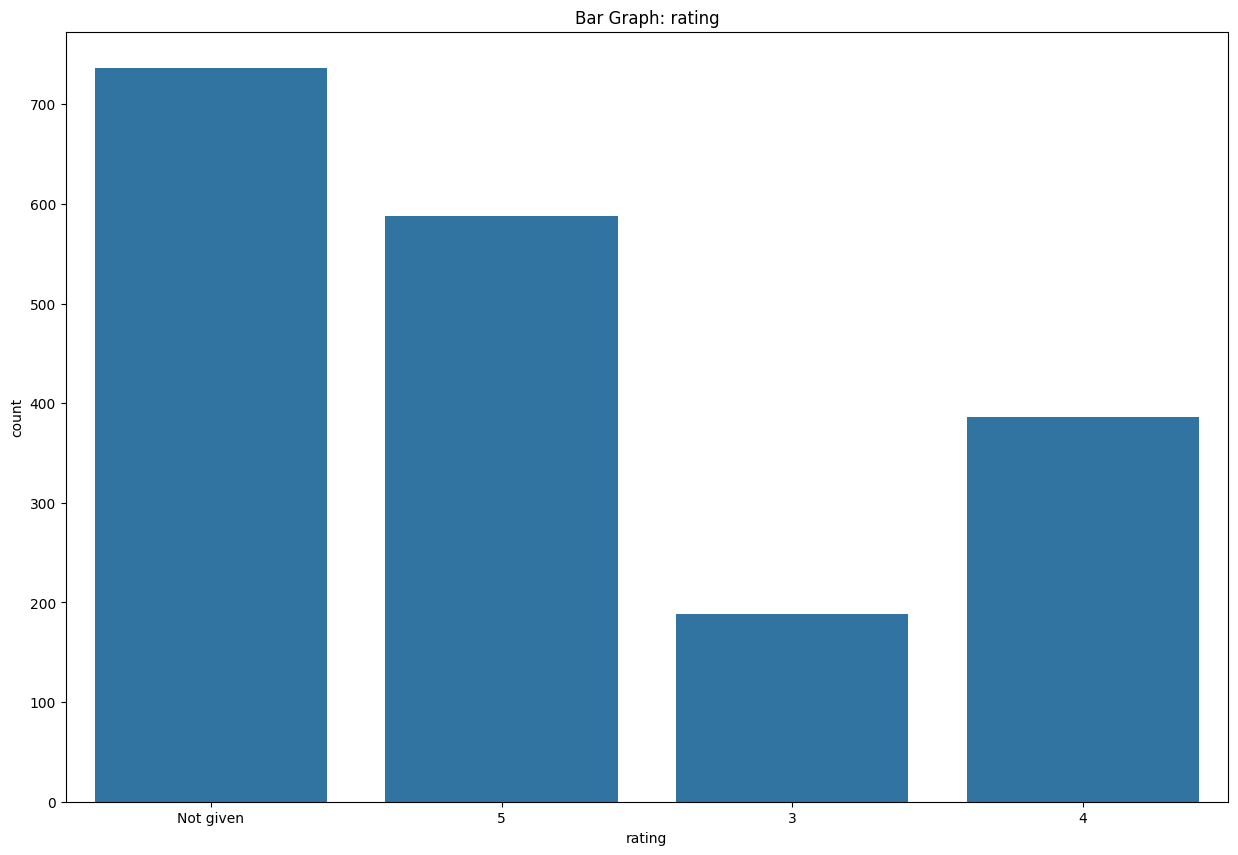

In [80]:
# Use a bar graph to visualize the differing amounts of ratings given vs. not given.
generate_bar_graph(df, 'rating')

#### food_preparation_time

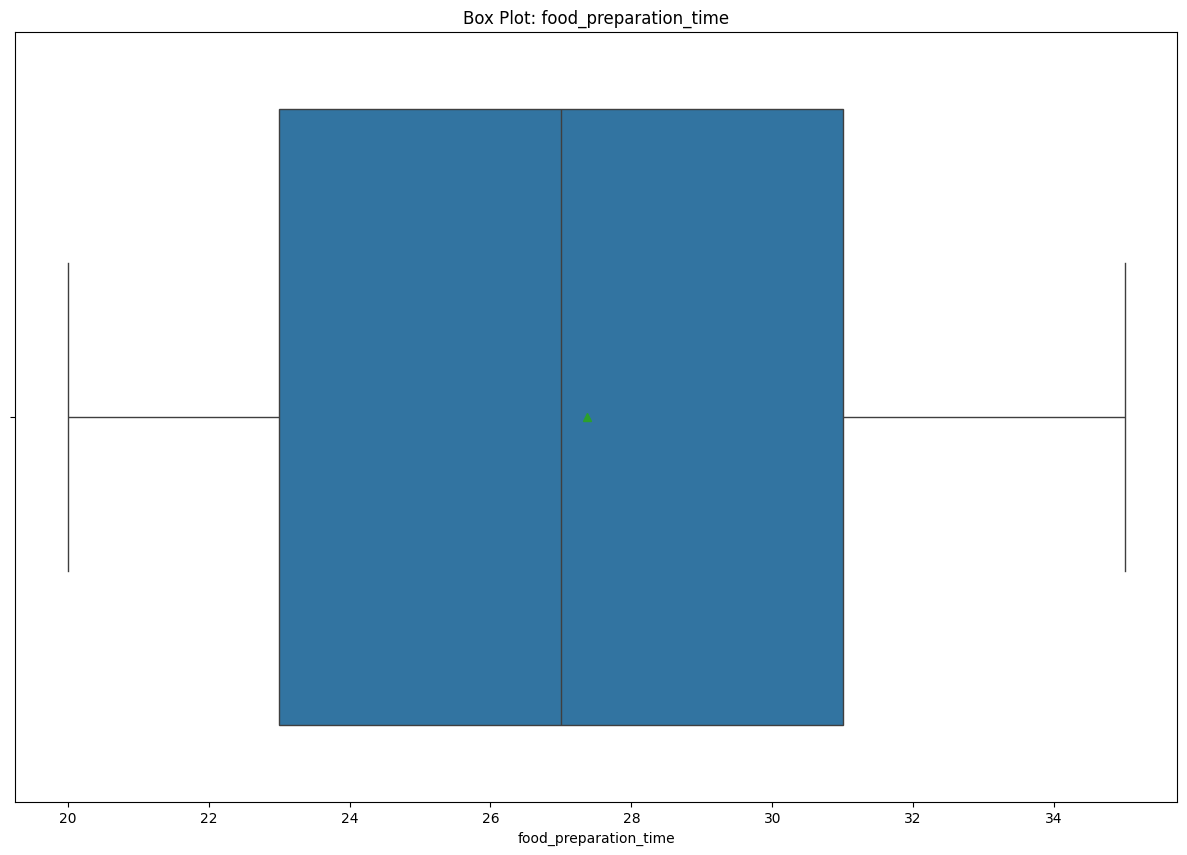

In [81]:
# generate a 1-D box plox to visualize the spread of food preparation times.
generate_1_D_box_plot(df, 'food_preparation_time')

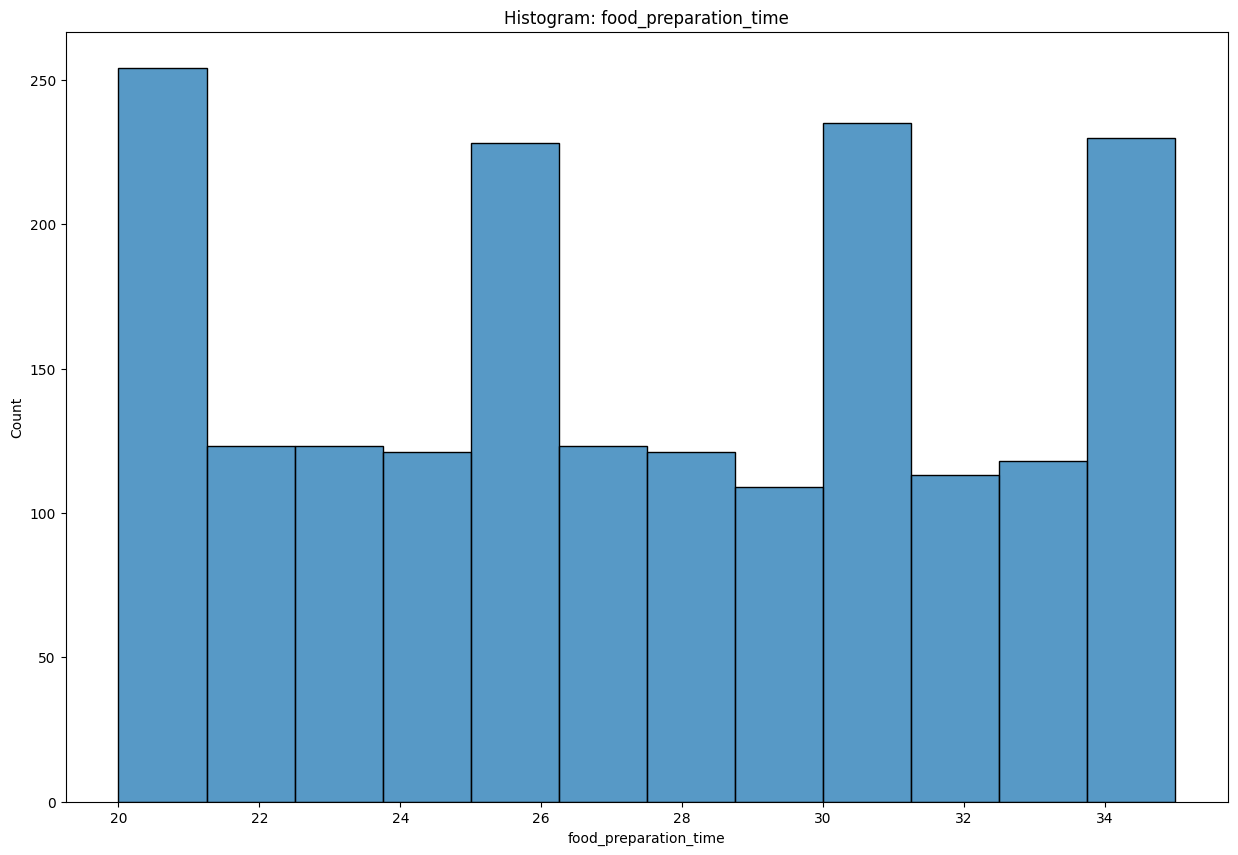

In [82]:
# Use a 1-D histogram to better visualize the distribtion of the food preparation times.
generate_1_D_histogram(df, 'food_preparation_time')

#### delivery_time

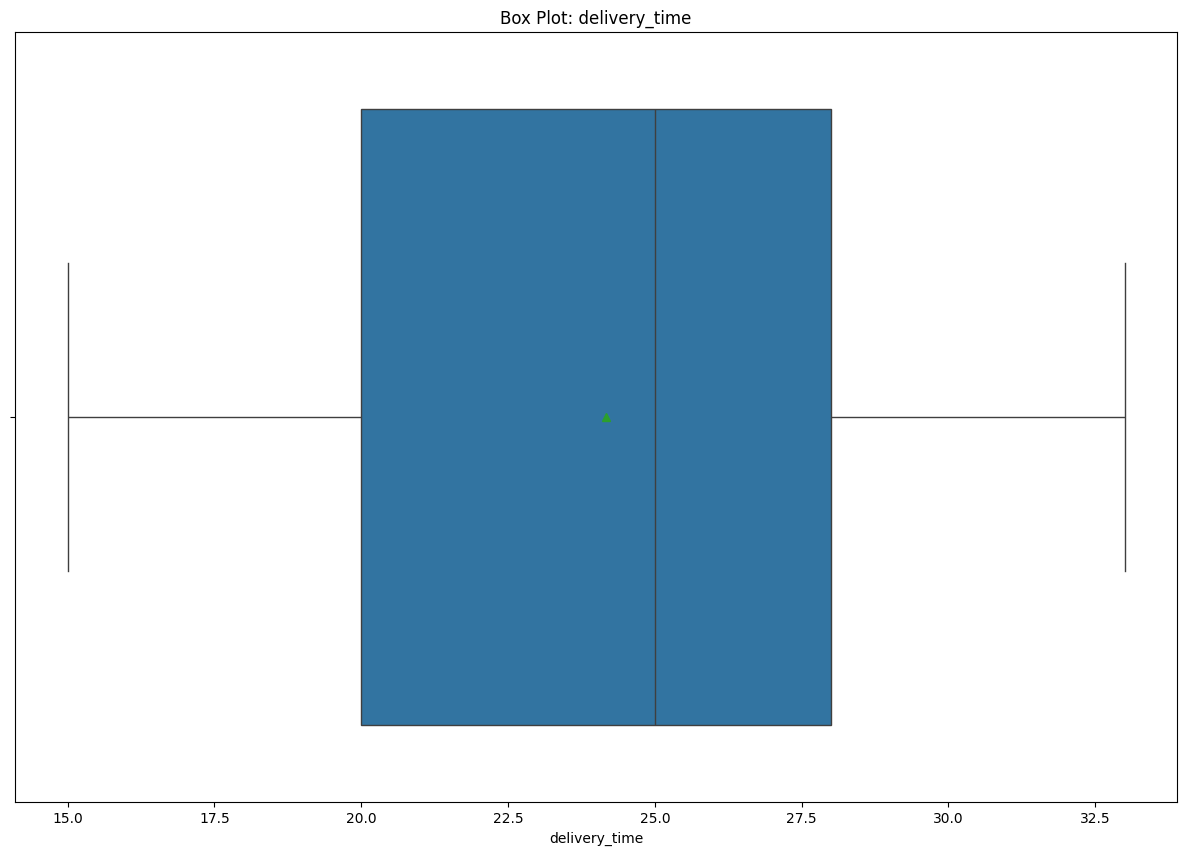

In [83]:
# generate a 1-D box plox to visualize the spread of delivery times.
generate_1_D_box_plot(df, 'delivery_time')

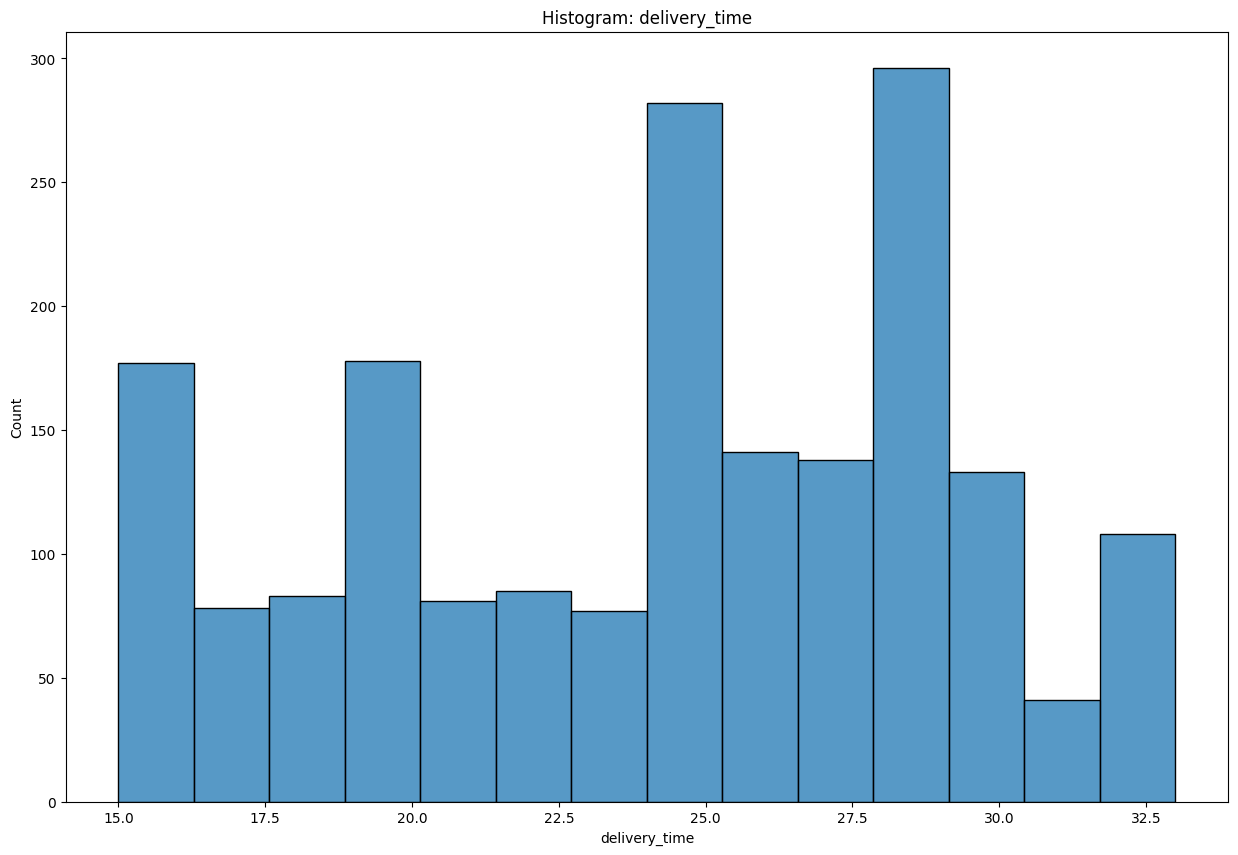

In [84]:
# Use a 1-D histogram to better visualize the distribtion of the delivery times.
generate_1_D_histogram(df, 'delivery_time')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [133]:
# Write the code here
df['restaurant_name'].value_counts().head()


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
* Shake Shack seems to be the most popular by a significant margin.
* The top 5 restaurants make up 634 of the total orders at ~33.40%.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [411]:
# Write the code here
""" 
Get the most popular cuisine on weekends by:
1. grouping the orders by 'day_of_the_week'.
2. getting only the orders where the day of the week is a Weekend.
3. getting the cuisine type of the weekend orders.
4. getting the most ordered cuisine type on the weekend.
"""
df.groupby('day_of_the_week').get_group('Weekend')['cuisine_type'].value_counts()


cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations:
* The most ordered cuisine type is American with 415 orders which correlates with the most ordered from restaurant being Shake Shack.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [412]:
# Write the code here
orders = df[df['cost_of_the_order'] > 20]

more_than_20 = 100 * (len(orders)/len(df['cost_of_the_order']))

print(f"The number of orders over $20 is {orders.shape[0]}")
print(f"{more_than_20:.2f}% of orders cost more than $20.")

The number of orders over $20 is 555
29.24% of orders cost more than $20.


#### Observations:
* It appears that just over a quarter of of the orders placed cost more than 20 dollars. 
* From Question 4, we see that the average order is ~ $16.50, the 75% quartile is ~ $22.30, and the max is ~ $35.41. Therefore, seeing that ~ 29.24% of orders being greater than $20 falls within the expected range.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [138]:
# Write the code here
print(f"The mean delivery time per order is {df['delivery_time'].mean():.2f} minutes.")

The mean delivery time/order is 24.16 minutes.


#### Observations:
* Looking at the result of Question 4 for delivery_time, the average delivery time per order doesn't appear to be skewed by any outliers.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [297]:
# Write the code here
print("The Top 3 Customers are: \n")
df['customer_id'].value_counts().head(3)

The Top 3 Customers are: 



customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

In [311]:
# number of customers who have only used the app once.
customer_use = df['customer_id'].value_counts()
print(f"Number of customers who have used the app once: {customer_use.where(customer_use < 2).sum()}")

Number of customers who have used the app once: 784.0


#### Observations:
* Customer '52832' has ordered through the app the most number of times (13). 
* Having the top 3 customers returning to the app for only a total of 32 times could indicate that customer return rates are poor. 
    * This is further supported by there being 784 customers who have only used the app once.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Observations
* cuisine vs. cost of order -> korean, vietnamese, mediterranean have outliers. Southern has the majority of it's orders in the top 75%.
* cuisine vs. prep time -> korean has outliers, majority have the same variance in prep time, the 50% is close to the mean (~27 minutes) for many. 
* delivery time is less on weekends
* prep time is unaffected by day of the week
* rating btw 3-4 improves with lower delivery time.
* prep time doesn't affect rating as much as delivery time
* the more expensive the order the better the rating.
* There doesn't appear to be much correlation btw cost, prep time and delivery time.
* Shake Shack and The Meatball Shop bring in the most revenue which correlates with their having the most ratings of '5'.

#### visulization methods

In [255]:
# heatmap
def generate_heatmap(
        data_corr:pd.DataFrame, 
        vmin:float = 0, 
        vmax:float = 1, 
        annot:bool = True, 
        cmap:str | None = 'coolwarm', 
        figsize:tuple[int, int] = (15,10),
        fmt:str = '.2f'
    ):
    """
    Generates a heatmap of two or more numerical variables.

    Params:
        data_corr: pd.DataFrame, the computed pairwise correlation between columns.
        vmin: float, min correlation value to anchor the colormap to. Default=0.
        vmax: float, max correlation value to anchor the colormap to. Default=1.
        annot: bool, display the computed correlation value into the cell. Default=True.
        cmap: str, data to color mapping. Default='coolwarm'.
        figsize: tuple(int, int), the size of the resulting bar graph. Default: (15,10).
        fmt: str, decimal value rounding. Default='.2f'.
    
    Returns:
        None
    """
    plt.figure(figsize=figsize)
    sns.heatmap(
        data=data_corr, 
        vmin=vmin,
        vmax=vmax,
        annot=annot, 
        cmap=cmap, 
        fmt=fmt, 
        xticklabels=data_corr.columns, 
        yticklabels=data_corr.columns
    )

In [201]:
# boxplots
def generate_2_D_box_plot(
        data:pd.DataFrame,
        x:str,
        y:str, 
        figsize:tuple[int,int] = (15, 10),
        palette:str = "Set1"
    ):
    """ 
    Generate a 2D Boxplot with color palette to define categories.
    
    Params:
        data: pd.DataFrame, the dataset.
        x: str, the column to place on the x-axis.
        y: str, the column to place on the y-axis.
        figsize: tuple(int, int), the size of the resulting boxplot, default: (15,10)
        palette: str, the color palette to differenciate the subplots. 
    
    Returns:
        None
    """
    plt.figure(figsize=figsize)
    plt.title(f"Box Plot: {x} vs. {y}")
    sns.boxplot(data=data, hue=x, y=y, palette=palette, gap=0.1, legend='brief')
    plt.xlabel(x)

In [232]:
# pointplot
def generate_point_plot(
        data:pd.DataFrame, 
        x:str, 
        y:str, 
        figsize:tuple[int, int] = (15, 7), 
        hue:str | None = None, 
        include_ci:bool = True
    ):
    """
    Generates a pointplot to compare categorical data of different types.
    
    Params:
        data: the dataset.
        x: the column to place on the x-axis.
        y: the column to place on the y-axis.
        figsize: the size of the resulting bar graph. Default: (15,10).
        hue: category(column) to compare x and y against. Default=None.
        include_ci: include the confidence interval. Default: True.
    
    Returns:
        None
    """
    plt.figure(figsize=figsize)
    category = f"compared along {hue}" if hue else None
    plt.title(f"Point Plot: {x} vs. {y} {category}")
    ci = ('ci', False) if not include_ci else ('ci', 95)
    sns.pointplot(data=data, x=x, y=y, hue=None, errorbar=ci)

#### cuisine_type vs. cost_of_the_order

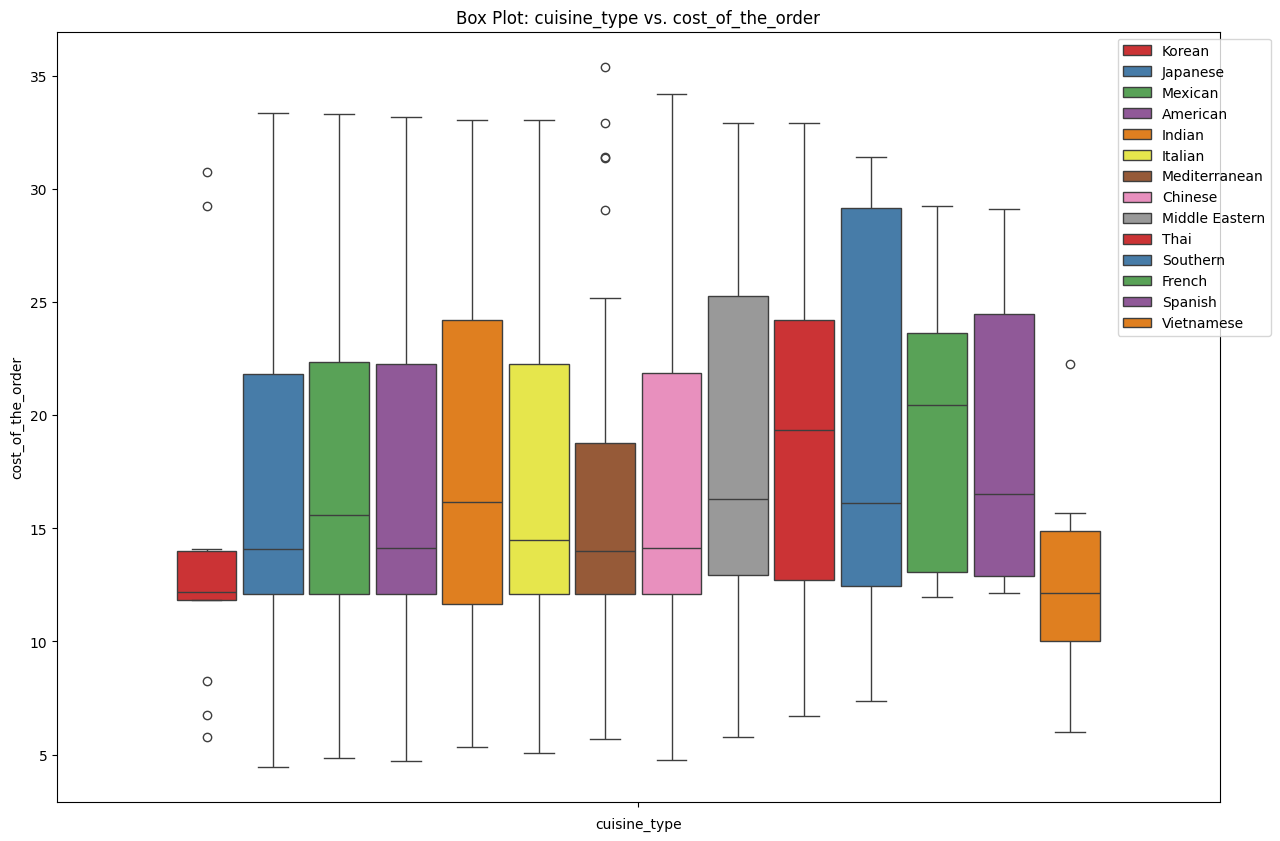

In [202]:
# display a boxplot of 'cuisine_type' vs. 'cost_of_the_order'
generate_2_D_box_plot(df, 'cuisine_type', 'cost_of_the_order')
plt.legend(bbox_to_anchor=[1.05, 1]);

#### cuisine_type vs. food_preparation_time

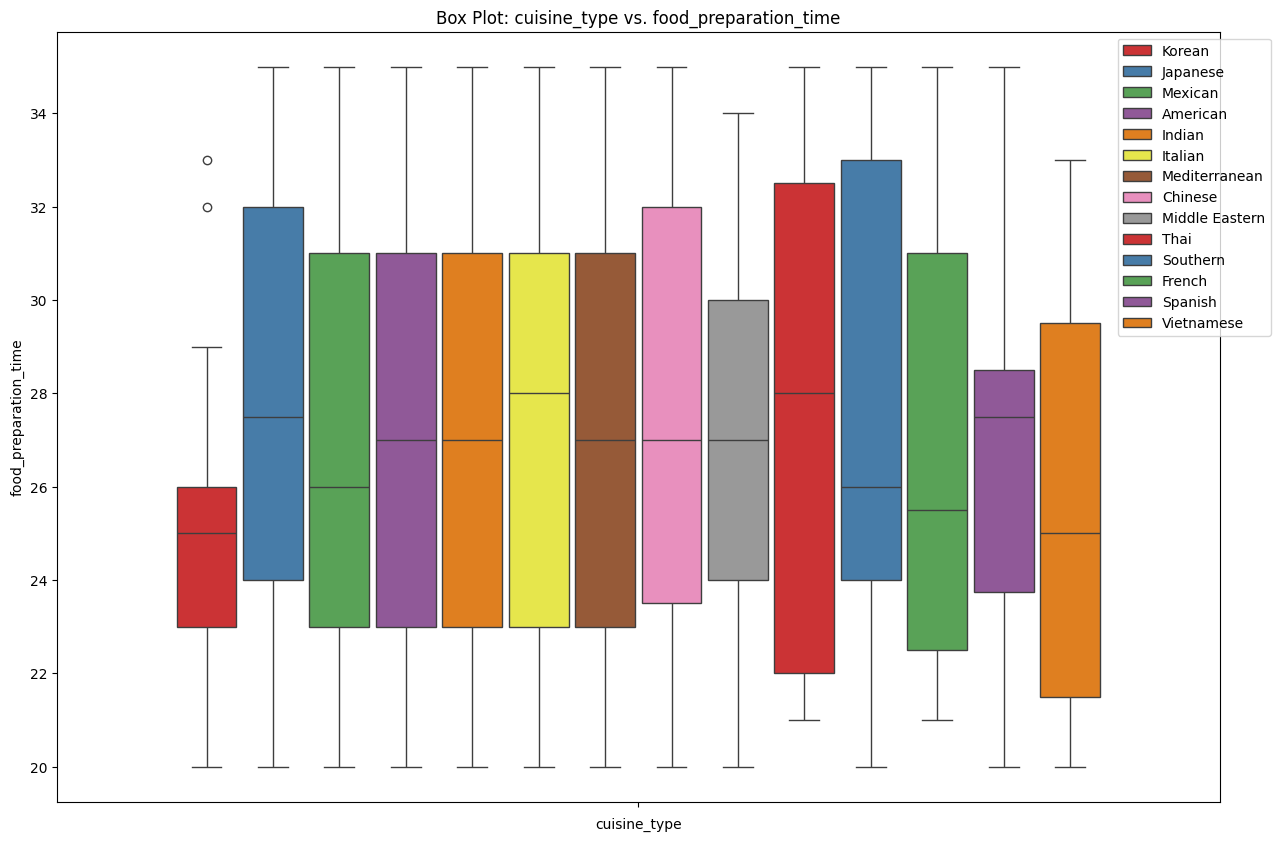

In [ ]:
# display a boxplot to visualize the relationship of 'cuisine_type' vs. 'food_preparation_time'
generate_2_D_box_plot(df, 'cuisine_type', 'food_preparation_time')
plt.legend(bbox_to_anchor=[1.05, 1]);

#### day_of_the_week vs. delivery_time

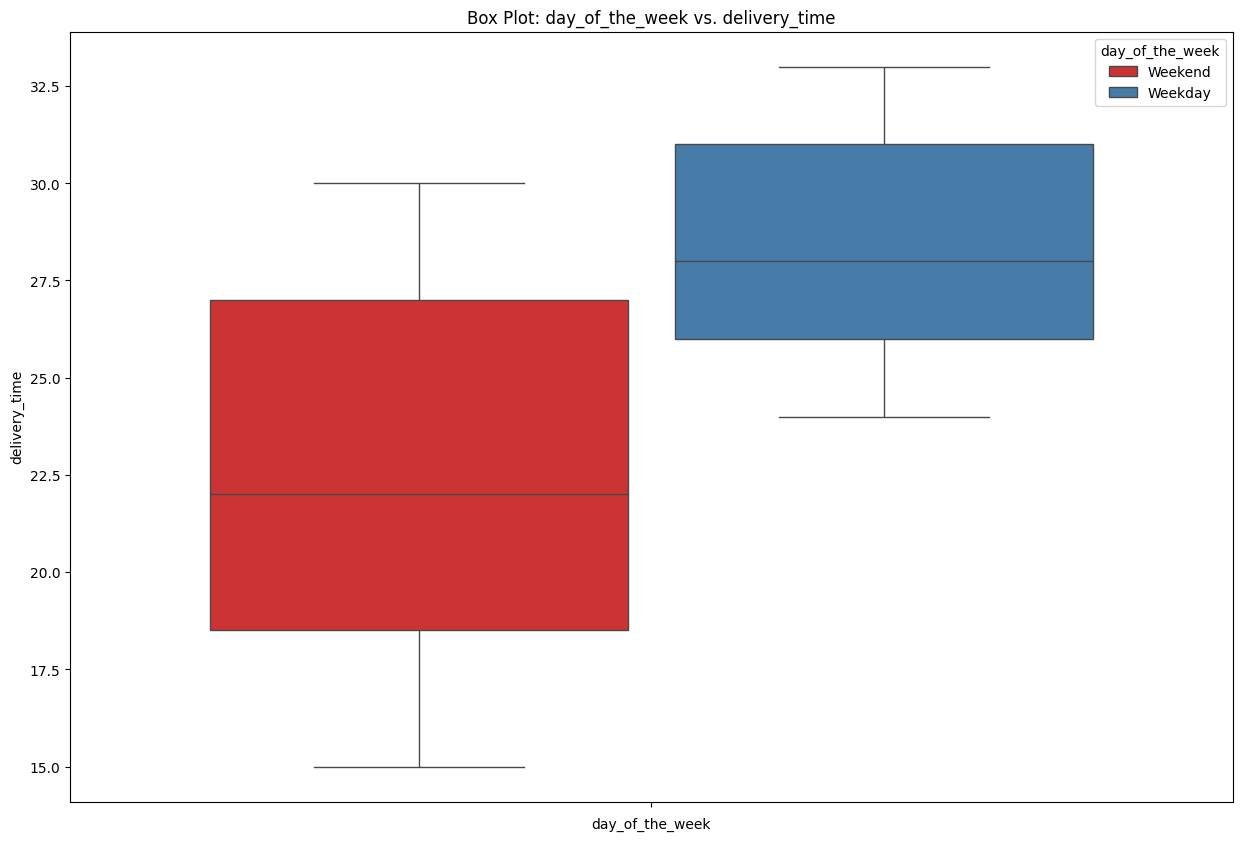

In [205]:
# display a boxplot to visualize the relationship of 'day_of_the_week' vs. 'delivery_time'
generate_2_D_box_plot(df, 'day_of_the_week', 'delivery_time')


#### day_of_the_week vs. food_preparation_time

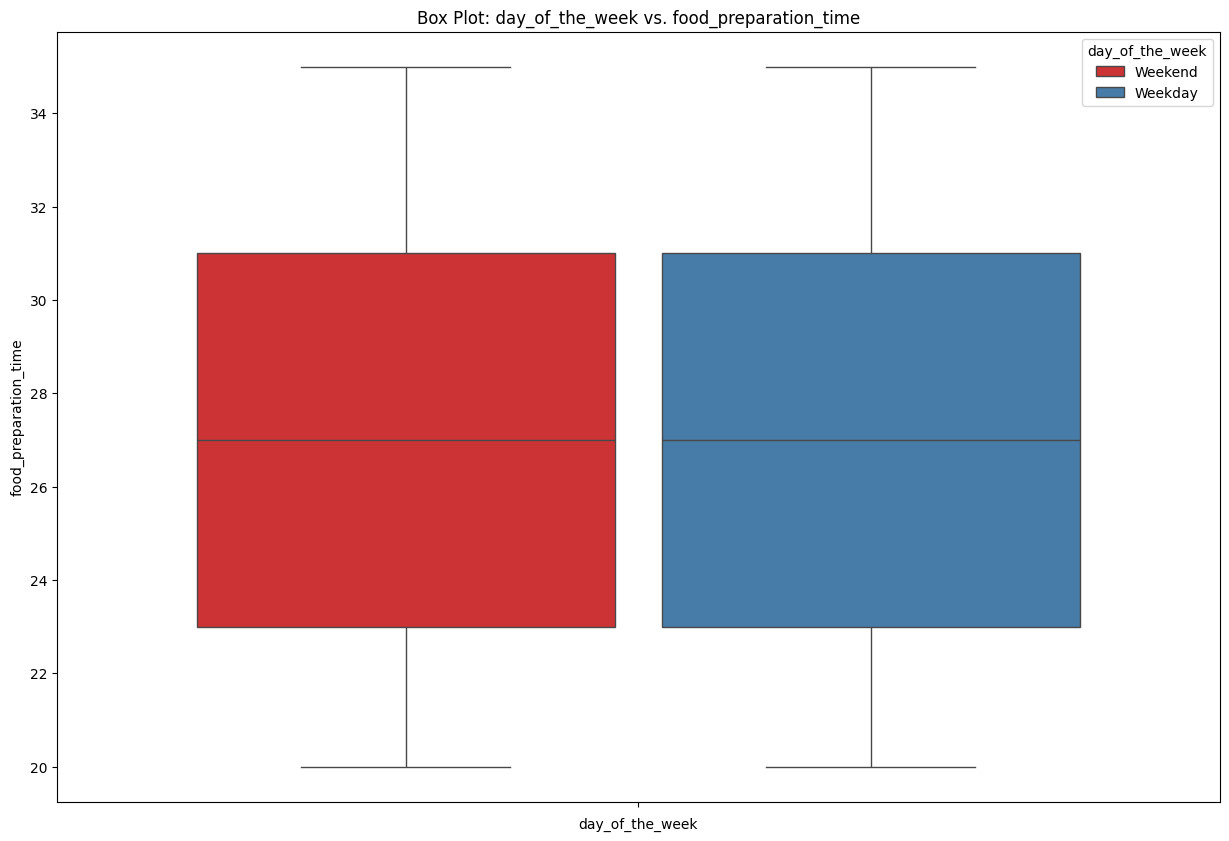

In [204]:
# display a boxplot to visualize the relationship of'day_of_the_week' vs. 'food_preparation_time'
generate_2_D_box_plot(df, 'day_of_the_week', 'food_preparation_time')

#### rating vs. delivery_time

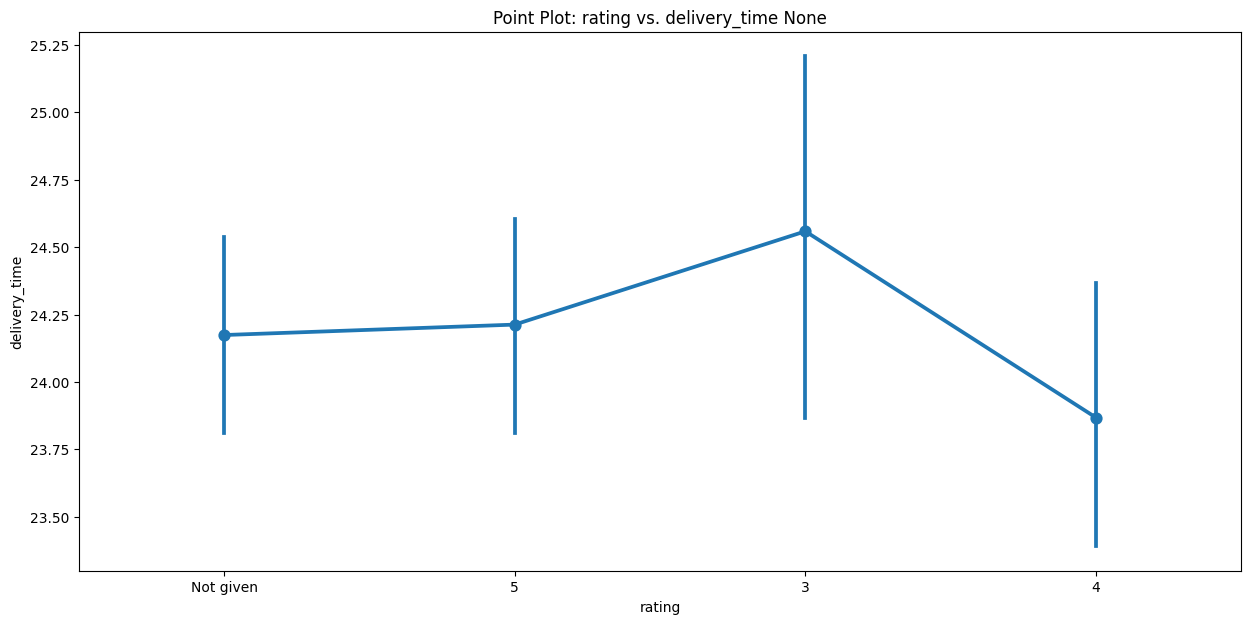

In [227]:
# display a point plot to visualize the relationship of 'rating' vs. 'delivery_time'
generate_point_plot(df, 'rating', 'delivery_time')

#### rating vs. food_preparation_time

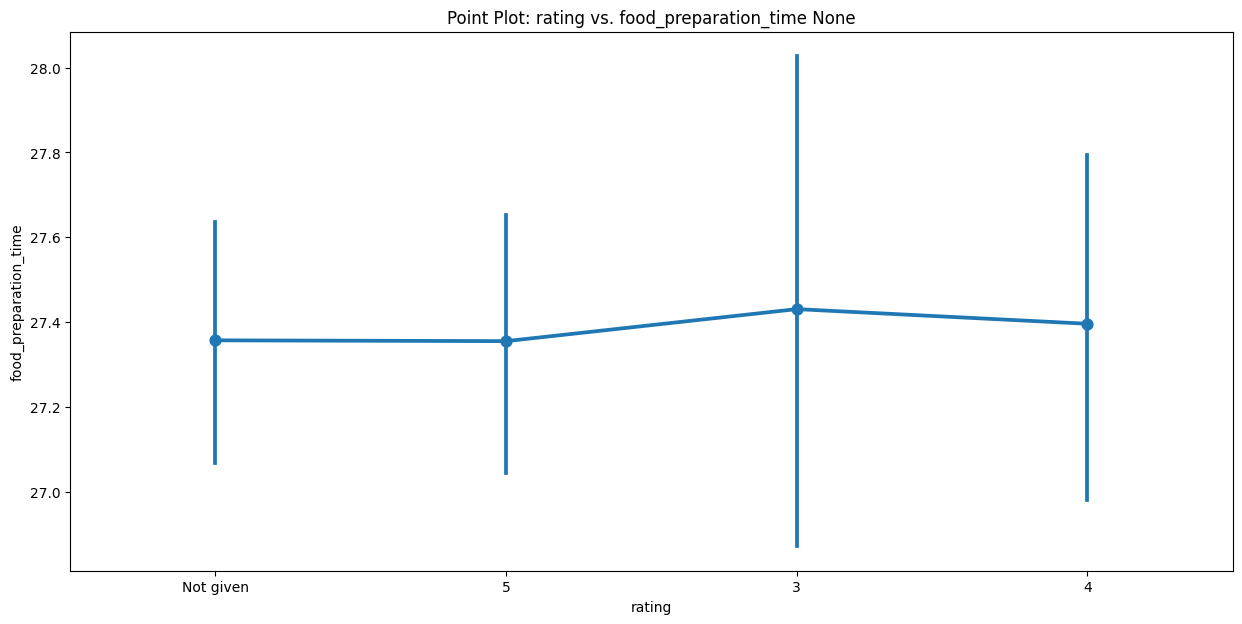

In [231]:
# display a point plot to visualize the relationship of 'rating' vs. 'food_preparation_time'
generate_point_plot(df, 'rating', 'food_preparation_time')

#### rating vs. cost_of_the_order

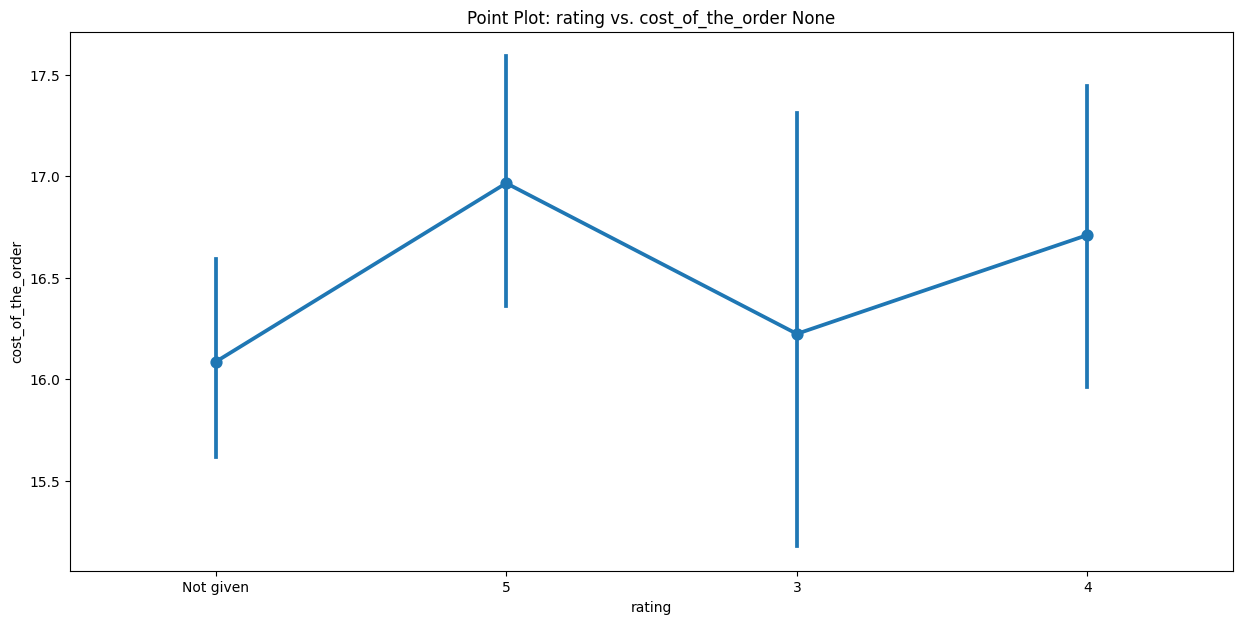

In [233]:
# display a point plot to visualize the relationship of 'rating' vs. 'cost_of_the_order'
generate_point_plot(df, 'rating', 'cost_of_the_order')

#### correlations
* food_preparation_time vs. cost_of_the_order vs. delivery_time

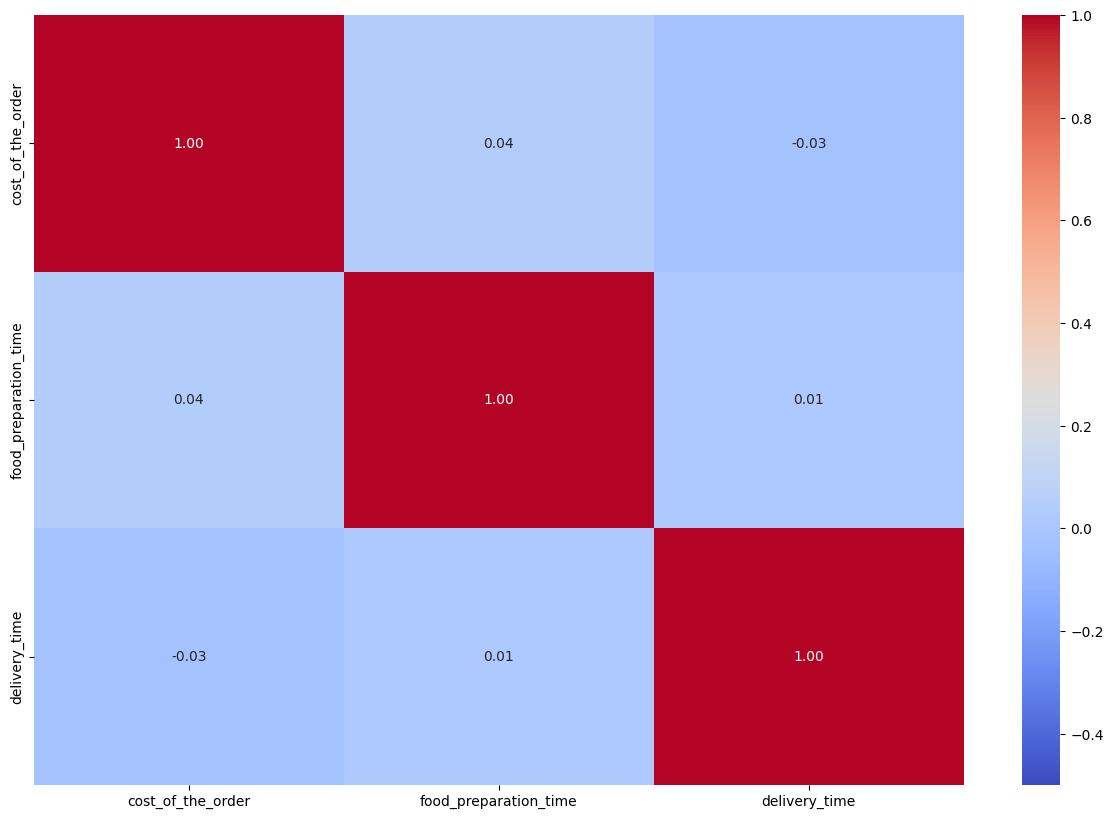

In [256]:
# display a to visualize the relationship between 
# food_preparation_time vs. cost_of_the_order vs. delivery_time
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
generate_heatmap(df[col_list].corr())


#### Most Successful Restaurants by Revenue

In [296]:
df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).head()

restaurant_name
Shake Shack                  3579.53
The Meatball Shop            2145.21
Blue Ribbon Sushi            1903.95
Blue Ribbon Fried Chicken    1662.29
Parm                         1112.76
Name: cost_of_the_order, dtype: float64

#### Most Successful by Number of '5' Ratings

In [349]:
# Remove all entries where a rating is 'Not given'
ratings = df[df['rating'] != 'Not given'].copy()

# Since the 'rating' category has a datatype of str, 
# we need to convert it to int to be able to perform math operations.
ratings['rating'] = ratings['rating'].astype(int)

# Get all entries in ratings where the 'rating' is 5.
five_star = ratings[ratings['rating'] > 4]

# Get the top 5 restaurants by number of 5-star ratings.
top_five = five_star.groupby('restaurant_name')['rating'].sum().sort_values(ascending=False).head()

# Get the number of top 5 ratings by restaurant.
top_five.apply(lambda x: x/5)

restaurant_name
Shake Shack                  60.0
The Meatball Shop            53.0
Blue Ribbon Sushi            32.0
Blue Ribbon Fried Chicken    32.0
RedFarm Broadway             18.0
Name: rating, dtype: float64

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [413]:
"""
NOTE: We're going to use the 'ratings' DataFrame we generated in 
Question 12: Most Successful by Number of '5' Ratings.
- ratings: pd.DataFrame, contains a subDataFrame of our dataset where:
    1. all entries with 'Not given' in the 'ratings' column are removed
    2. the data type of the 'ratings' column is converted from string to integer
        so that we can perform mathematical operations using/on the values.
"""

# First get the total number of ratings per restaurant. 
rating_count = ratings['restaurant_name'].value_counts().reset_index()

# Next, we get all the restuarants that have more than 50 ratings.
more_than_50 = rating_count.where(rating_count['count'] > 50)

# Then, we get a subDataFrame of 'ratings' where only the restaurants who have greater than 50
# ratings are in the DataFrame. 
average_of_4 = ratings[ratings['restaurant_name'].isin(more_than_50['restaurant_name'])].copy()

# Lastly, we get the mean of the ratings by restuarant.
average_of_4.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False).head()


restaurant_name
The Meatball Shop            4.511905
Blue Ribbon Fried Chicken    4.328125
Shake Shack                  4.278195
Blue Ribbon Sushi            4.219178
Name: rating, dtype: float64

#### Observations:
The Meatball Shop has the highest average rating at 4.51/5.
* If we look up at 'Question 12: Most Successful by Number of '5' Ratings' we can see that The Meatball shop didn't have the most number of 5's given, but Shake Shack did(60).
* Shake Shack comes in 3rd for average ratings at 4.28/5.


If we look at the total number of ratings for this group we can see that Shake Shack has 49 more ratings than The Meatball Shop which indicates that comparing the two restaurants average ratings to eachother might not be the most accurate gauge of which one is better.
* Shake Shack: 133
* The Meatball Shop: 84
* Blue Ribbon Sushi: 73
* Blue Ribbon Fried Chicken: 64




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [415]:
def get_revenue(cost:float):
    """
    Take the cost of an order and calculate the amount made by the 
    company on that order. 
        - if cost > $20, then amount_made = cost * 0.20
        - if $5 < cost <= $20, then amount_made = cost * 0.15
        - if cost < $5, then amount_made = 0

    Params:
        cost: float, the cost of an order.
    
    Return:
        float: the amount made on the order.
    """
    amount_made = 0
    if cost > 20:
        amount_made = cost * 0.25
    elif cost > 5:
        amount_made = cost * 0.15

    return amount_made


In [375]:
# First copy the cost_of_the_order column so that we don't change the original dataset.
cost_of_orders = df['cost_of_the_order'].copy()

# Get the total revenue across all orders.
total_revenue = df['cost_of_the_order'].sum()

# Get the net revenue made by the company.
net_revenue = cost_of_orders.apply(get_revenue).sum()

print(f"The net revenue made by the company is approximately ${net_revenue:.2f}.")
print(f"The total amount brought into the app is approximately ${total_revenue:.2f}.")

The net revenue made by the company is approximately $6166.30.
The total amount brought into the app is approximately $31314.82.


#### Observations:
* The company's net revenue is approximately 19.69% of the total revenue brought into the app. 

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [395]:
# create a new column in the dataset that contains the total time from order to receipt.
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# get only those orders that took over 60 minutes.
time_60 = df[df['total_time'] > 60]

# get the percent of orders that tooke more than 60 minutes.
percent_60 = 100 * (time_60.shape[0]/df.shape[0])

print(f"The percent of orders that took more than 60 minutes to deliver is {percent_60:.2f}%")


The percent of orders that took more than 60 minutes to deliver is 10.54%


#### Observations:
* The majority of orders are delivered in under 60 minutes.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [408]:
# get the delivery times on the weekdays vs. the weekends.
weekdays = df['delivery_time'].where(df['day_of_the_week'] == 'Weekday')
weekends = df['delivery_time'].where(df['day_of_the_week'] == 'Weekend')

print(f"The mean delivery time on Weekdays is ~{weekdays.mean():.0f} minutes.")
print(f"The mean delivery time on Weekends is ~{weekends.mean():.0f} minutes.")

The mean delivery time on Weekdays is ~28 minutes.
The mean delivery time on Weekends is ~22 minutes.


#### Observations:
* The average delivery time on the Weekends is faster than that on the Weekdays. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
We anaylzed over 1800 orders made through the app. The main feature of interest in the data is the customer preferance for certain restaurants. From a business perspective, offering enhanced customer experiences on less frequently ordered from restuarants would be ineffiecient to boost margins. 

From our analysis we have been able to conclude:
1. Shake Shack is the most popular restuarant followed closely by The Meatball Shop. These two restuarants also bring in the most revenue.
2. The most popular cuisine is American. 
3. Customers use the app to order more on Weekends than Weekdays.
4. Delivery times are slower on Weekdays than Weekends, while food preparation time is not affected by day of the week. 
5. Ratings are affected by the total time between order and reciept however, the large majority of orders take less than 60 minutes to arrive. 
6. Customers rated more expensive orders higher than less expensive ones.
7. Out of the top 5 most ordered from restuarants, 4 of them have over 50 ratings each with an average rating of ~4. However, nearly 40% of customers don't rate their orders.
8. ~30% of orders are over $20.
9. The range of the cost of the orders varies greatly by cuisine type, while food preparation time shows similar ranges across cuisines. 
10. Customer return rates could be better with many customers having only used the app once.  

### Recommendations:
1. Investigating why the company delievry drivers take more time to deliver orders on weekdays than weekends should be a priority because customer satisfaction is directly affected by the time it takes for them to receive their order.
2. American cuisine is a favorite among customers and expanding restuarant options in this market may have the potential to improve revenue. 
    * Other cuisine markets to investgate would be Italian and Japanese based on customers rating The Meatball Shop and Blue Ribbon Sushi frequently and highly. 
4. Since many customers appear to only use the app once, it is critical to procure more data on User Experience to better understand what improvements can be made to increase customer return rates.
5. Moving from a single rating for the whole order to a rating system based on subset of the dataset categories is important, as a single rating does not provide enough data to thouroughly understand customer experience.
    * Given that only ~60% of customers rate their orders, determing how to increase customer usage of the rating system is advisable. 
5. Understanding the relationship between the order cost, cuisine type and customer rating could provide valuable insights into what, perhaps, more niche markets are worth to expanding into and/or offering promotions for.
6. Promotional offerings should be given on weekends when customer usage of the app increases, and, when possible, only on orders of over $20 to potentially increase net revenue. 
    * Restaurant Advertisment Promotions should primarily be given to the most popular resturants, but restuarants where the average cost of an order is over $20 could also be prioritized.
    * Customer Usage Promotions could be given only to those who use the app most frequently, but it is unlikely to generate more revenue. Instead, customers who use the app infrequently should be given a promotional offer to potentially increase customer return usage, and app advertisment to potential users.


---